1. The "Pre-lecture" video (above) mentioned the "standard error of the mean" as being the "standard deviation" of the distribution bootstrapped means. What is the difference between the "standard error of the mean" and the "standard deviation" of the original data? What distinct ideas do each of these capture? Explain this concisely in your own words.

Overall, standard error of the mean tells you the reliable of the sample mean and standard deviation represents how spread the datas are, either closer or further to the mean. If we want to know the standar error of the mean value of original dataset, we can calculate the standard deviation of the distribution after bootstrapping. 

2. The "Pre-lecture" video (above) suggested that the "standard error of the mean" could be used to create a confidence interval, but didn't describe exactly how to do this. How can we use the "standard error of the mean" to create a 95% confidence interval which "covers 95% of the bootstrapped sample means"? Explain this concisely in your own words.

After we get the standard error of the mean we have to choose a 95% confidence level base on the common value that comes from the normal distribution. Finally, we use the mean to add and minus confidence level to calculate the confidence interval. (Confidence Inerval + confidence level, Confidence Interval - confidence level)

3. Creating the "sample mean plus and minus about 2 times the standard error" confidence interval addressed in the previous problem should indeed cover approximately 95% of the bootstrapped sample means. Alternatively, how do we create a 95% bootstrapped confidence interval using the bootstrapped means (without using their standard deviation to estimate the standard error of the mean)? Explain this concisely in your own words.

After we get the bootstrapped means by taking (for example, the number of times they took in the video) 1000 means from the bootstrapped dataset. We find the value of 25th position and the value of 975th position and the interval between these two is the confidence interval.

4. The "Pre-lecture" video (above) mentioned that bootstrap confidence intervals could apply to other statistics of the sample, such as the "median". Work with a ChatBot to create code to produce a 95% bootstrap confidence interval for a population mean based on a sample that you have and comment the code to demonstrate how the code can be changed to produce a 95% bootstrap confidence interval for different population parameter (other than the population mean, such as the population median).

In [1]:
import numpy as np

# Function to calculate bootstrap confidence interval for any statistic
def bootstrap_confidence_interval(data, statistic_func, num_bootstrap_samples=1000, confidence_level=0.95):
    """
    Calculates the bootstrap confidence interval for a given statistic (e.g., mean, median).
    
    Parameters:
        data (array-like): Sample data.
        statistic_func (function): Function to compute the statistic (e.g., np.mean, np.median).
        num_bootstrap_samples (int): Number of bootstrap samples (default is 1000).
        confidence_level (float): Confidence level for the interval (default is 0.95 for 95% confidence).
        
    Returns:
        (lower_bound, upper_bound): Lower and upper bounds of the confidence interval.
    """
    # Number of data points in the original sample
    n = len(data)
    
    # Array to store the bootstrap statistics
    bootstrap_statistics = np.zeros(num_bootstrap_samples)
    
    # Generate bootstrap samples
    for i in range(num_bootstrap_samples):
        # Resample the data with replacement
        bootstrap_sample = np.random.choice(data, size=n, replace=True)
        
        # Calculate the statistic (mean, median, etc.) for the bootstrap sample
        bootstrap_statistics[i] = statistic_func(bootstrap_sample)
    
    # Sort the bootstrap statistics
    sorted_bootstrap_statistics = np.sort(bootstrap_statistics)
    
    # Calculate the confidence interval bounds
    lower_percentile = (1 - confidence_level) / 2
    upper_percentile = 1 - lower_percentile
    lower_bound = np.percentile(sorted_bootstrap_statistics, lower_percentile * 100)
    upper_bound = np.percentile(sorted_bootstrap_statistics, upper_percentile * 100)
    
    return lower_bound, upper_bound

# Example usage: Bootstrap CI for the mean of a sample
np.random.seed(0)  # For reproducibility
sample_data = np.random.normal(loc=50, scale=10, size=100)  # Generate some random sample data

# Call the function to calculate the 95% CI for the population mean
mean_ci = bootstrap_confidence_interval(sample_data, np.mean, num_bootstrap_samples=1000, confidence_level=0.95)
print(f"95% Bootstrap Confidence Interval for the mean: {mean_ci}")

# ----------------------------
# To calculate the confidence interval for the median, change np.mean to np.median
median_ci = bootstrap_confidence_interval(sample_data, np.median, num_bootstrap_samples=1000, confidence_level=0.95)
print(f"95% Bootstrap Confidence Interval for the median: {median_ci}")

# To calculate the confidence interval for the standard deviation, create a custom function
std_ci = bootstrap_confidence_interval(sample_data, np.std, num_bootstrap_samples=1000, confidence_level=0.95)
print(f"95% Bootstrap Confidence Interval for the standard deviation: {std_ci}")


95% Bootstrap Confidence Interval for the mean: (48.644004504524496, 52.64801746733626)
95% Bootstrap Confidence Interval for the median: (47.999080299139514, 53.13067701650901)
95% Bootstrap Confidence Interval for the standard deviation: (8.747613558538808, 11.358872340588581)


We can change it in order to calculate other population parameter by replacing np.mean.
For example: To calculate the median, simply replace np.mean with np.median

Summary:
Topic: Bootstrapping and Confidence Intervals
1. Difference between Standard Error of the Mean (SEM) and Standard Deviation (SD)
Standard Deviation (SD) measures how spread out individual data points are in your dataset.
Standard Error of the Mean (SEM) tells you how much your sample mean is likely to vary if you took multiple samples.
SD is for the variability of the data itself, while SEM is for how precise your sample mean is.
2. Using SEM to Create a 95% Confidence Interval
The 95% confidence interval is created by multiplying the SEM by 1.96 (since 95% of the normal distribution falls within 1.96 standard deviations from the mean).
This interval tells you that 95% of the time, your sample mean will fall within this range.
3. Why 1.96 is Used
The value 1.96 comes from the normal distribution, where 95% of data lies within 1.96 standard deviations from the mean. It’s used in confidence intervals to capture 95% of the possible sample means.
4. Creating a 95% Bootstrapped Confidence Interval
Bootstrapping involves taking many resamples of your data (with replacement), calculating the statistic of interest (e.g., the mean) for each resample, and then determining the middle 95% of the bootstrapped sample means.
Steps:
Resample the data many times (e.g., 1000 times).
Calculate the sample mean for each resample.
Sort the bootstrapped means and find the 2.5th percentile (lower bound) and 97.5th percentile (upper bound) to create the 95% confidence interval.
5. Python Code for Bootstrap Confidence Interval
I provided a Python function to compute a bootstrap confidence interval for any population parameter (mean, median, standard deviation, etc.).
The code uses the np.random.choice function to resample data with replacement, calculates the statistic (mean in the default case), and finds the bounds of the confidence interval by taking the 2.5th and 97.5th percentiles of the bootstrapped statistics.
Link: https://chatgpt.com/share/66ff36f5-d6b4-8008-934b-176da0f6146c

5. The previous question addresses making a confidence interval for a population parameter based on a sample statistic. Why do we need to distinguish between the role of the popualation parameter and the sample sample statistic when it comes to confidence intervals? Explain this concisely in your own words.

We distinguish between the role of the population parameter and the sample statistic because the sample statistic is what we can calculate from the original data and population parameter is what we want to know and confidence intervals helps with that. 

6. Provide written answers explaining the answers to the following questions in an informal manner of a conversation with a friend with little experience with statistics.

6.1 What is the process of bootstrapping?

1. Make a Bootstrapped Dataset by randomly selecting data from the original dataset and each data could be select more than once but the overal number of measurements should be same. 
2. Calculate the statistic of interest.
3. Collect the calculated statistics from the previous step to form the bootstrap distribution of the statistic by repeating the last step thouthands of times. 

6.2 What is the main purpose of bootstrapping?

Overall, the main purpose of bootstrapping is to find the confidence intervals in order to get range of measurement needed and important. 

6.3 If you had a (hypothesized) guess about what the average of a population was, and you had a sample of size n from that population, how could you use bootstrapping to assess whether or not your (hypothesized) guess might be plausible?

Basically, use the sample we had and follow the process of question 6.1 to find the bootstapping and check weither the guess fits the mean or not. 

7. The "Pre-lecture" video (above) introduced hypothesis testing by saying that "the confidence interval covers zero, so we cannot reject the hypothesis that the drug is [on average] not doing anything". This conclusion could be referred to as "failing to reject the null hypothesis", where the term "null" refers to the concept of "no effect [on average]". Why does a confidence interval overlapping zero "fail to reject the null hypothesis" when the observed sample mean statistic itself is not zero? Alternatively, what would lead to the opposite conclusion in this context; namely, instead choosing "to reject the null hypothesis"? Explain the answers to these questions concisely in your own words.

The confidence interval is the range of values contains the useful datas. Since "zero" is in this range, and especially the mean is really close to zero. there are possibilities that the drug is on average not doing anything. If we want an opposite conclusion, don't include the zero in the rabge of confidence interval. Overall, confidence interval is a range not a specific number. 

8. Vaccine Data Analysis Assignment

In this assignment, we are disccsuing weither the vaccine did help or not base on the dataset given. We will be using bootstrapp to help us going through, and the vaccine will be consider no effect if the boomstrapp mean is at zero. 

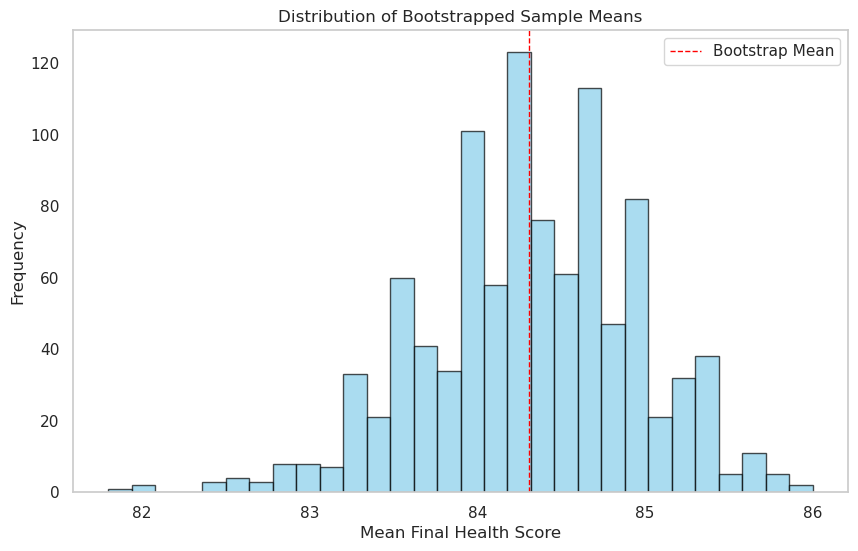

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = {
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

df = pd.DataFrame(data)

# Bootstrapping parameters
n_bootstraps = 1000
bootstrapped_means = []

# Perform bootstrapping
for _ in range(n_bootstraps):
    # Create a bootstrap sample (with replacement)
    bootstrap_sample = df['FinalHealthScore'].sample(frac=1, replace=True)
    # Calculate the mean of the bootstrap sample
    bootstrapped_means.append(bootstrap_sample.mean())

# Plot the distribution of bootstrapped sample means
plt.figure(figsize=(10, 6))
plt.hist(bootstrapped_means, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(np.mean(bootstrapped_means), color='red', linestyle='dashed', linewidth=1, label='Bootstrap Mean')
plt.title('Distribution of Bootstrapped Sample Means')
plt.xlabel('Mean Final Health Score')
plt.ylabel('Frequency')
plt.legend()
plt.grid()
plt.show()


Overall, the vaccine is effective for most of the times, since the bootsrap mean is higher than average but there are possibilities that the vaccine did not work since the confidence interval includes final health score lower than initial health score. 

9.  Have you reviewed the course wiki-textbook and interacted with a ChatBot (or, if that wasn't sufficient, real people in the course piazza discussion board or TA office hours) to help you understand all the material in the tutorial and lecture that you didn't quite follow when you first saw it?

No

Summary:
Confidence Intervals:

You inquired about the need to distinguish between population parameters and sample statistics in confidence intervals. I explained that population parameters represent true values we want to estimate, while sample statistics are derived from collected data and used to estimate these parameters. Confidence intervals account for uncertainty and help us infer about the population based on the sample.
Bootstrapping Process:

You asked about the process of bootstrapping. I outlined the steps, which include creating bootstrap samples by resampling with replacement, calculating the statistic of interest for each sample, and forming a bootstrap distribution by repeating the process multiple times. This method allows for estimating variability and constructing confidence intervals.
Assessing a Hypothesized Mean with Bootstrapping:

You sought clarification on using bootstrapping to assess the plausibility of a hypothesized population mean. I provided a detailed step-by-step process, including formulating hypotheses, generating bootstrap samples, calculating test statistics, and determining p-values to evaluate the null hypothesis.
Confidence Interval Definition:

You requested an explanation of confidence intervals. I defined a confidence interval as a range of values estimating a population parameter, characterized by a point estimate, margin of error, and confidence level. I included a detailed example to illustrate the concept.
Bootstrapping Code Example:

You provided a dataset and requested code to visualize bootstrapping results. I supplied a Python code snippet that loads the dataset, performs bootstrapping on the final health scores, and plots the distribution of the bootstrapped sample means.
Link:https://chatgpt.com/share/66ff44b5-e4e0-8008-b27f-ae072c9b74bc